In [ ]:
%load_ext autoreload
%autoreload 2

In [8]:
import sys
sys.path.append('../src')
from features.build_features import MelPipeline

import torch
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [9]:
mel_pipe = MelPipeline()

mel_pipe.to(device=torch.device("cuda"), dtype=torch.float32)

features = mel_pipe("../data/raw/Magenta/bass_synthetic_068-022-075.wav")

In [10]:
features.shape

torch.Size([256, 345])

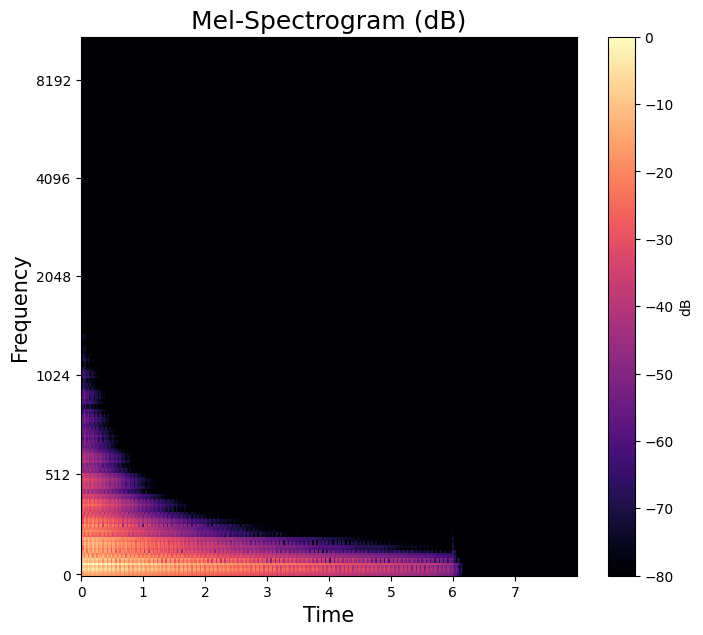

In [11]:
mel_spectro = np.abs(features)
power_to_db = librosa.power_to_db(mel_spectro, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=mel_pipe.resample_sr, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=512)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()